In [102]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import mannwhitneyu, shapiro

warnings.filterwarnings("ignore")


df = pd.read_csv('rides_final.csv', sep=',', skipinitialspace=True, encoding='utf-8')
df['start_date'] = pd.to_datetime(df['start_date'], format='%Y-%m-%d %H:%M:%S')
df['end_date'] = pd.to_datetime(df['end_date'], format='%Y-%m-%d %H:%M:%S')

In [103]:
lower_bound = df.drive_dur.quantile(q=0.01)
upper_bound = df.drive_dur.quantile(q=0.99)
df['drive_dur'] = df[(lower_bound < df.drive_dur) & (df.drive_dur < upper_bound)]['drive_dur']

In [104]:
weekdays_dur = df[df['start_date'].dt.weekday < 5]['drive_dur']
holidays_dur = df[df['start_date'].dt.weekday >= 5]['drive_dur']
print(weekdays_dur)
print(holidays_dur)

1926     28.0
1927     30.0
1928     33.0
1929     17.0
1930     21.0
         ... 
97367    22.0
97368    40.0
97369    22.0
97370    47.0
97371    23.0
Name: drive_dur, Length: 61221, dtype: float64
0        24.0
1        29.0
2        39.0
3        32.0
4        31.0
         ... 
96387    18.0
96388    19.0
96389    33.0
96390    19.0
96391    28.0
Name: drive_dur, Length: 36151, dtype: float64


<Axes: xlabel='drive_dur', ylabel='Density'>

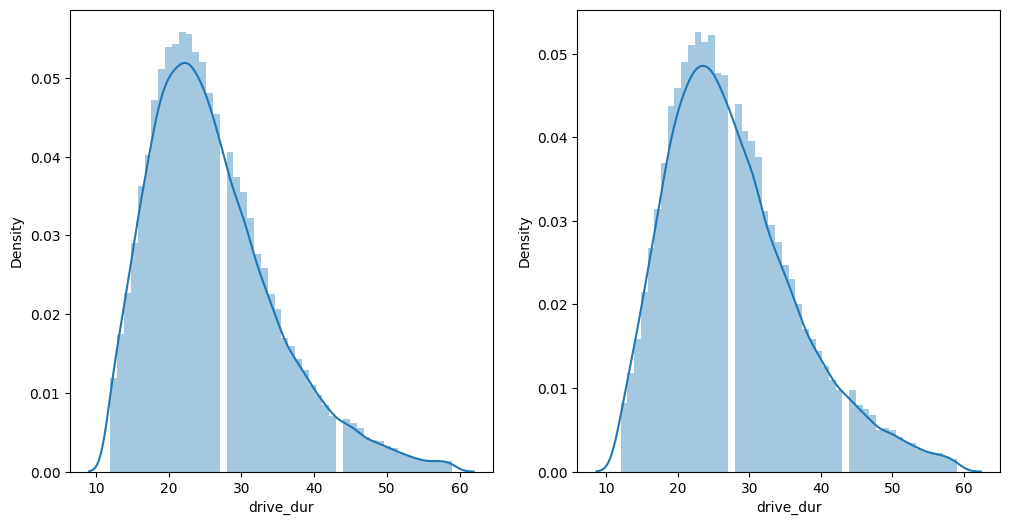

In [105]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.distplot(weekdays_dur, ax=ax[0])
sns.distplot(holidays_dur, ax=ax[1])

In [106]:
weekdays_test = weekdays_dur.sample(20000)
holidays_test = weekdays_dur.sample(20000)

print('Weekdays normal:', shapiro(weekdays_test))
print('Holidays normal:', shapiro(holidays_test))

Weekdays normal: ShapiroResult(statistic=nan, pvalue=nan)
Holidays normal: ShapiroResult(statistic=nan, pvalue=nan)


Оба распределения ненормальны

Посмторим на сами распределния

<Axes: ylabel='drive_dur'>

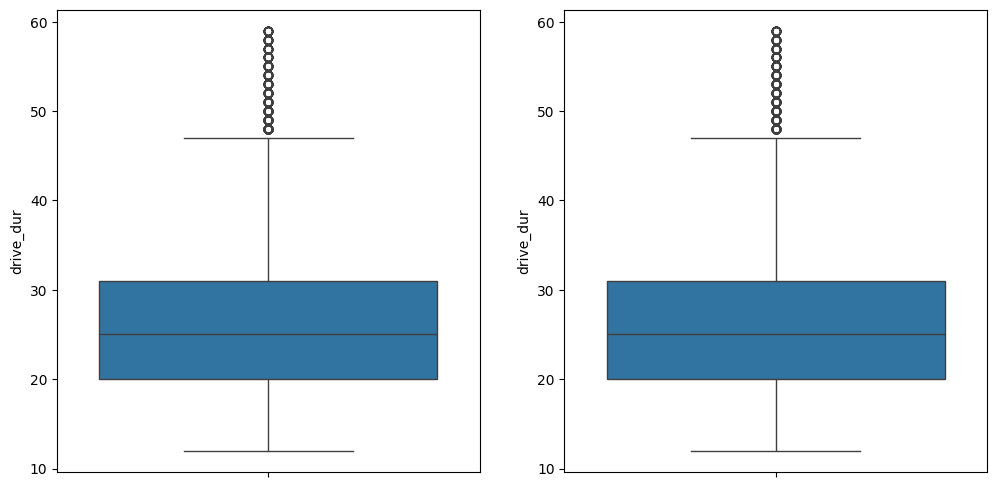

In [107]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(weekdays_test, ax=ax[0])
sns.boxplot(holidays_test, ax=ax[1])

In [108]:
print(mannwhitneyu(weekdays_test, holidays_test, alternative='two-sided'))

MannwhitneyuResult(statistic=nan, pvalue=nan)
